# {Teen Pregnancy and Sex Education in the US}📝

![Banner](./assets/banner.jpeg)

## Topic
*What problem are you (or your stakeholder) trying to address?*
📝 <!-- Answer Below -->

I am addressing the problem of teen pregnancy in the United States and examining if and how it relates to a lack of sex education. 

## Project Question
*What specific question are you seeking to answer with this project?*
*This is not the same as the questions you ask to limit the scope of the project.*
📝 <!-- Answer Below -->

The specific question I am seeking to answer with this project is: "Is there a correlation between lack of sex education and increased teen pregnancy?"

## What would an answer look like?
*What is your hypothesized answer to your question?*
📝 <!-- Answer Below -->

An answer could be expressed with a visualization such as a table or a bar chart showcasing the states with the highest and lowest teen pregnancy numbers, their overall population, and  their policies surrounding sex education. 

The answer itself would be: "Yes/No, there is/isn't strong evidence to suggest increased teen pregnancy directly correlates to a lack of sex education." 

## Data Sources
*What 3 data sources have you identified for this project?*
*How are you going to relate these datasets?*
📝 <!-- Answer Below -->

My datasets are:
- CDC Wonder (https://wonder.cdc.gov/controller/datarequest/D149;jsessionid=C8DCABB90CDF366055F96EA1D525 and https://wonder.cdc.gov/controller/datarequest/D192;jsessionid=70DEF061E23E358712E1506B71DF). This is a query based data source that allows you to view birth rates with different filters. I have imported the 2016-2024 and 2024-2025 natality datasets. 

- The United States Census (https://data.census.gov/table?q=teen+population+by+state&y=2024). This is united states census data filtered to focus on teens aged 15-19. 

- Parents Defending Education: Sex Education Laws By State (https://actionpde.org/sex-education-laws-by-state/). This is a website showcasing sex education laws by state. I have downloaded the website data as a PDF and extracted the raw text using pdfplumber. 

I will relate these datasets by state. When applicable, I will also use year, "Mandate Sex Ed" (Sex Education Laws By State), and age. 

## Approach and Analysis
*What is your approach to answering your project question?*
*How will you use the identified data to answer your project question?*
📝 <!-- Start Discussing the project here; you can add as many code cells as you need -->

My approach will be to:
- Calculate the average and raw teen pregnancy rate per state using census population numbers and CDC natality data. 

- Extract data from the Sex Education Laws by State site and convert it into a usable table, including whether sex education is required and how comprehensive it is. 

- Connect datasets by year and when applicable "Mandata Sex Ed" and/or age. 

- Explore visualizations to illustrate the data and results. 

In [42]:
# Start your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import pdfplumber


# Importing my sources: 

#Census data: 
census = pd.read_csv("ACSST1Y2024.S0902-2025-09-28T050122.csv")
#Birth data from 2016-2024
BirthData20162024 = pd.read_csv("Natality, 2016-2024 expanded-2.csv")
#Birth data from 2023 to July 2025
BirthData2025 = pd.read_csv("Provisional Natality 2023 through Last Month-2.csv")

#Using pdfplumber to extract text from PDE-Action_-Sex-Education-State-Laws_v2-1.pdf, which will later be used to create a dataframe
#First extracting the first page as a test
# with pdfplumber.open("PDE-Action_-Sex-Education-State-Laws_v2-1.pdf") as pdf_v1:
#     pdf_full_text_v1 = ""
#     for page in pdf_v1.pages:
#             pdf_full_text_v1 += page.extract_text() + "\n"
with pdfplumber.open("PDE-Action_-Sex-Education-State-Laws_v2-3.pdf") as pdf_v3:
    pdf_full_text_v3 = ""
    for page in pdf_v3.pages:
            pdf_full_text_v3 += page.extract_text() + "\n"

## Checkpoint 2: Exploratory Data Analysis & Visualization - Data Cleaning and Transformation

- First, I configured the PDF into usable data (below). This was done by extracting the raw text from the PDF document, splitting the raw text into lines, then putting the answers to the questions I need into a dataframe. I'm working with a simplified version of the document that contains the answers to Q1 (Does the state mandate sex ed?) and Q2 (Does the state have an opt-in/opt-out policy?) to make the dataframe creation process quicker. This process may be changed later if I decided to add the answers to other questions on the document to my dataset. 
- Scroll down to see the data cleaning and transformation of my remaining sources. 

In [ ]:
#Configuring the PDF into usable data.
import re
import pandas as pd

#Splitting my text into lines
lines = pdf_full_text_v3.strip().split('\n')
if lines[0].lower().startswith("state"):
    lines = lines[1:]
#Creating my dataframe
data = [line.split(maxsplit=2) for line in lines if line.strip()]
StateLawDF = pd.DataFrame(data, columns=["State", "Mandates Sex Ed?", "Opt-in/Opt-out Policy?"])

In [16]:
#Testing the PDF Dataframe
#print(pdf_full_text_v3)
#print(StateLawDF)
#print(StateLawDF["Mandates Sex Ed?"].value_counts())
#print(StateLawDF["State"].value_counts())

- Next, I cleaned my Natality, 2016-2024 expanded-2 excel document (below). I abbreviated the state names to match the Sex-Education-State-Laws document, simplified the "State of Residence" header to "State", and created a dataframe with my cleaned data.
- Scroll down to see the data cleaning and transformation of my remaining sources. 

In [69]:
#Birth data from 2016-2024. Columns are State of Residence, Age of Mother, Births.
#State will need to be abbeviated and "State of Residence" will be changed to "State"
import pandas as pd
BirthData20162024 = pd.read_csv("Natality, 2016-2024 expanded-2.csv")

#Cleaning the data: 
#1. State needs to be abbreviated from full name to two-letter postal code, so it will match the data in the state laws PDF. 
state_abbreviations = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "District of Columbia": "DC",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY"
}

#Creating a pandas dataframe with state, age of mother, and births
BirthData20162024 = pd.DataFrame(BirthData20162024, columns=["State of Residence", "Age of Mother", "Births"])
#Mapping the state names to abbreviations
BirthData20162024["State Abbreviation"] = BirthData20162024["State of Residence"].map(state_abbreviations)
#Dropping the original state name column
BirthData20162024 = BirthData20162024.drop(columns=["State of Residence"])
#Renaming the new column to "State"
BirthData20162024 = BirthData20162024.rename(columns={"State Abbreviation": "State"})

total_births_by_state_2016_2024 = BirthData20162024.groupby("State")["Births"].sum().reset_index()
#Testing the cleaned Birth Dataframe
#print(BirthData20162024)

- The next step in the data cleaning process was to repeat the above steps with the 2023 - 2025 natality dataset (below). The only difference is the 2023-25 set had some blank values at the end that needed to be dropped. 

In [ ]:
#We're repeating the above process for the 2023-2025 Birth Data

#Birth data from 2023 to July 2025
import pandas as pd
BirthData2025 = pd.read_csv("Provisional Natality 2023 through Last Month-2.csv")

BirthData20232025 = pd.DataFrame(BirthData2025, columns=["State of Residence", "Age of Mother", "Births"])
#Mapping the state names to abbreviations
BirthData20232025["State Abbreviation"] = BirthData20232025["State of Residence"].map(state_abbreviations)
#Dropping the original state name column
BirthData20232025 = BirthData20232025.drop(columns=["State of Residence"])
#Renaming the new column to "State"
BirthData20232025 = BirthData20232025.rename(columns={"State Abbreviation": "State"})
#Dropping any blank values
BirthData20232025.dropna(how="all", inplace=True)

total_births_by_state_2023_2025 = BirthData20232025.groupby("State")["Births"].sum().reset_index()

#Testing the cleaned Birth Dataframe
# pd.set_option("display.max_rows", None)
# print(BirthData20232025)

## Checkpoint 2: Exploratory Data Analysis & Visualization - Data Visualization and EDA

Visualization #1: Count of states (50 states + DC) mandating sex ed by answer (yes, no, partial)
- Questions this visualization answers

Visualization #2: Count of states (50 states + DC) by opt-in/opt-out policy type (opt-in, opt-out, no policy)
- Questions this answers


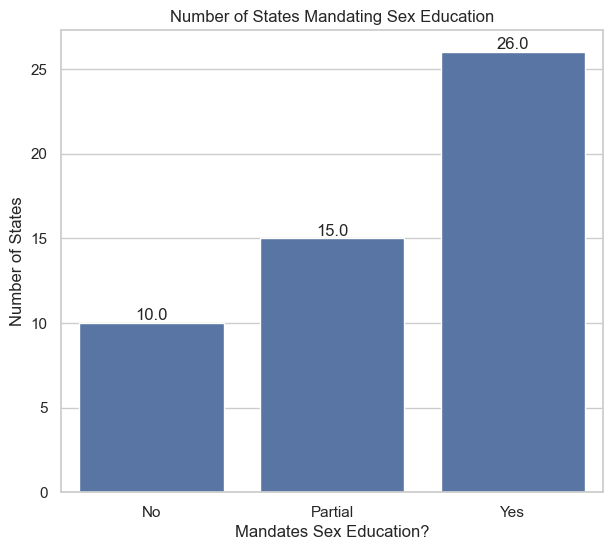

In [62]:
#Visualization #1: Count of states (50 states + DC) mandating sex ed by answer (yes, no, partial)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(7, 6))
ax = sns.countplot(x="Mandates Sex Ed?", data=StateLawDF)
ax.set_title("Number of States Mandating Sex Education")
ax.set_xlabel("Mandates Sex Education?")
ax.set_ylabel("Number of States")
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom')
plt.show()


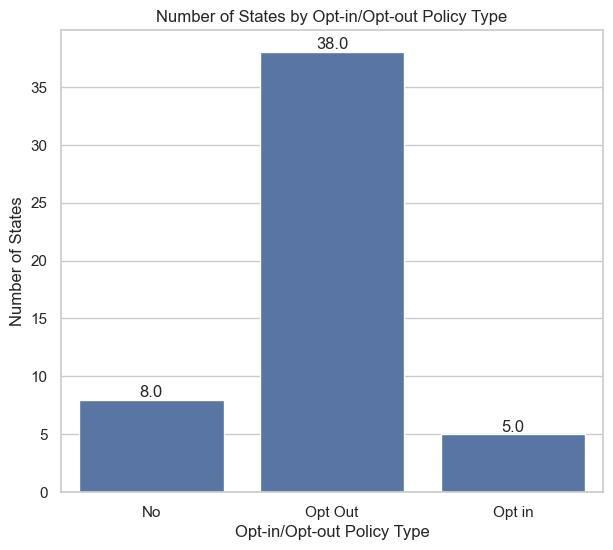

In [63]:
#Visualization #2: Count of states (50 states + DC) by opt-in/opt-out policy type (opt-in, opt-out, no policy)
plt.figure(figsize=(7, 6))
ax = sns.countplot(x="Opt-in/Opt-out Policy?", data=StateLawDF)
ax.set_title("Number of States by Opt-in/Opt-out Policy Type")
ax.set_xlabel("Opt-in/Opt-out Policy Type")
ax.set_ylabel("Number of States")
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom')
plt.show()

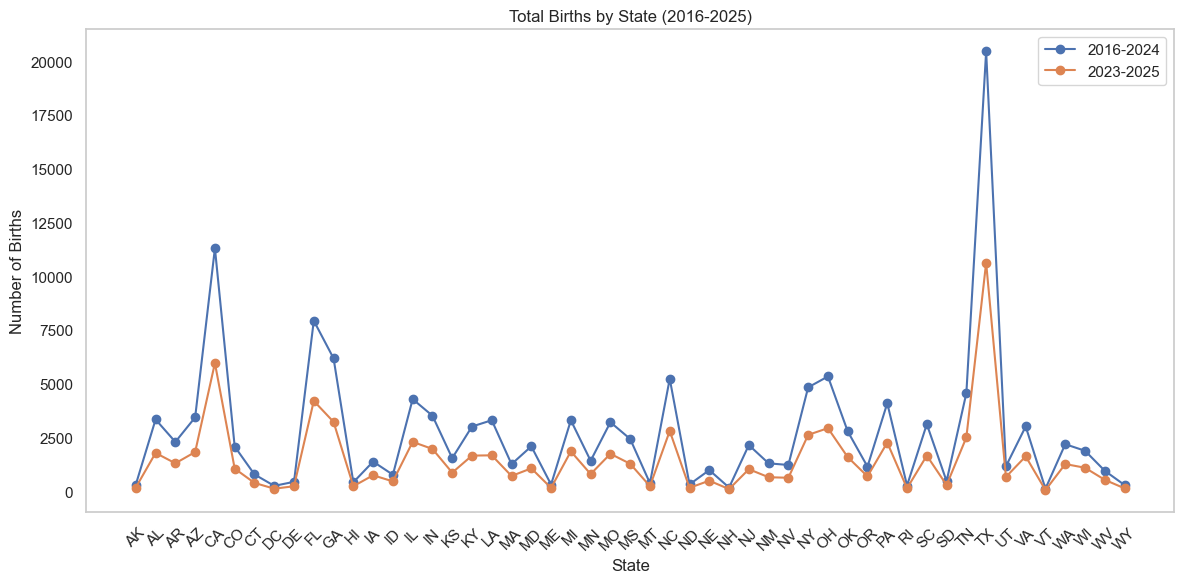

In [ ]:
# Visulization #3: Line graph showing trend of births from 2016 to 2025
# Two separate lines, one for the 2016-2024 data and one for the 2023-2025 data

import matplotlib.pyplot as plt
import numpy as np
total_births_by_state_2023_2025 = BirthData20232025.groupby("State")["Births"].sum().reset_index()

#total births by state for each dataset
plt.figure(figsize=(12, 6))
states = total_births_by_state_2016_2024["State"]
plt.plot(states, total_births_by_state_2016_2024["Births"], marker='o', label='2016-2024')
plt.plot(states, total_births_by_state_2023_2025["Births"], marker='o', label='2023-2025')
plt.title("Total Births by State (2016-2025)")
plt.xlabel("State")
plt.ylabel("Number of Births")
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()


## Resources and References
*What resources and references have you used for this project?*
📝 <!-- Answer Below -->

Resourced used: 
- https://wonder.cdc.gov/
- https://data.census.gov/
- https://actionpde.org/sex-education-laws-by-state/
- https://www.pdfplumber.com/
- https://www.cdc.gov/nchs/state-stats/births/teen-births.html

In [4]:
# ⚠️ Make sure you run this cell at the end of your notebook before every submission!
!jupyter nbconvert --to python source.ipynb

[NbConvertApp] Converting notebook source.ipynb to python
[NbConvertApp] Writing 4137 bytes to source.py
